# Math 104B: Homework 1
- Name: Eduardo Escoto
- Email: e_escoto@ucsb.edu
- Perm: 7611817
- Instructor: Hector D. Ceniceros
- Term: Winter 2020

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown as md

___

### Problem 1

The concentration of a radioactive material decays according to the law $c(t) = be^{-at}$ where $t$ represents the time in seconds, $a = 0.1 \textrm{sec}^{-1}$  and $b$ is the initial concentration.

#### Part a)
Using the Least Squares Method, and the data table below, to find b.


| $t_i$ (sec) | $C_i$   |
|------|------|
|   $1$  | $0.91$ |
|  $2$  | $0.80$ |
|  $3$  | $0.76$ |
|  $4$  | $0.65$ |

##### Solution

As shown in **Example 5.5** in the course notes, to find $b$, we have the following expression:

$$b = \frac{\displaystyle{\sum_{j = 1}^{N}}f_{j}e^{ax_{j}}}{\displaystyle{\sum_{j = 1}^{N}}e^{2ax_{j}}}$$

Here we instantiate the data to use.

In [2]:
# Instantiating Data and Parameters
a = -0.1
t = np.arange(1,5) # t_i
C = np.array([0.91, 0.80, 0.76, 0.65]) # C_i

And here we implement the expression to create the function with the parameters

In [3]:
# Calculates b and returns the least squares function and the function parameters
def getExponentialLS(X, F, a):
    b = np.sum(F*(np.e**(a*X)))/np.sum(np.e**(2*a*X))    
    exp_func = lambda t: b*(np.e**(a*t))
    return (exp_func, [a,b])

And now we use our function to get the Least Squares Approximation.

In [4]:
c, (a, b) = getExponentialLS(t, C, a) # Using our function

And we find a value for b and the function

In [5]:
print("b = " + str(b))

b = 0.9959492989517316


Thus we have $b=0.9959492989517316$, with the formula being  $c(t)=0.99595⋅exp(−0.1t)$

Graphing the function against the tested values:

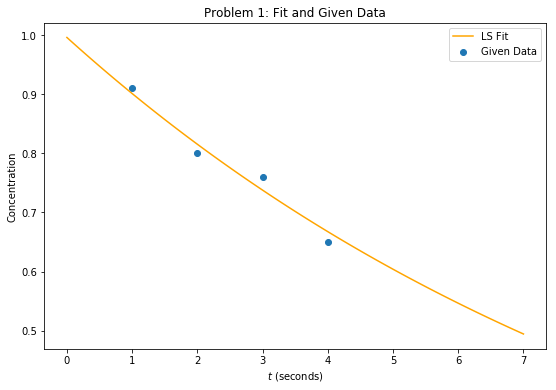

In [6]:
# Testing
x = np.linspace(0,7,100)

plt.figure(figsize=(9,6))
plt.title("Problem 1: Fit and Given Data")
plt.plot(x, c(x), label = "LS Fit", color = "orange")
plt.scatter(t, C, label = "Given Data")
plt.xlabel("$t$ (seconds)")
plt.ylabel("Concentration")
plt.legend();

#### Part b) Find the error in the least squares approximation.

The error for the least squares approximation of the decay function, $J$, in the least squares approximation can be expressed as the sum of the squared differences in the 2-norm as:

$$J(a,b) = \sum_{j = 1}^{N}\left[f_j - be^{at_{j}}\right]^{2}$$

##### Solution
Thus we have the following error:

$$J(a,b) = \sum_{j = 1}^{N}\left[f_j - 0.99595\exp({-0.1t_{j}})\right]^{2}$$

Which we now calculate below:

In [7]:
J = np.sum((C - c(t))**2)
print("J = " + str(J))

J = 0.0011175280104658244


The error in our Least Squares Approximation is: $J(−0.1,0.99595)=0.001118$

___

### Problem 2
Given a collection of data points $\left\{(x_i,y_i)\right\}^{m}_{i=1}$ find the best least squares approximation of the form $y=ax^{2}+bx^{3}$

##### Solution
In order to find the best Least Squares approximation of the form $y = ax^2 + bx^3$, we begin with its error function

$$J(a,b) = \sum^{N}_{j=1}\left[y_j - a{x_j}^{2} - b{x_j}^{3}\right]^{2}$$

We then next take the partial derivatives in respect to $a$ and $b$ and set to the LS Conditions such that we can solve for the normal equations.

We do this as:

$$\frac{\partial J}{\partial a} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j}^{2} - b{x_j}^{3}\right] {x_j}^{2}$$
$$\frac{\partial J}{\partial b} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j}^{2} - b{x_j}^{3}\right] {x_j}^{3}$$

Which then have the conditions:
$$\frac{\partial J}{\partial a} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j}^{2} - b{x_j}^{3}\right] {x_j}^{2} = 0$$
$$\frac{\partial J}{\partial b} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j}^{2} - b{x_j}^{3}\right] {x_j}^{3} = 0$$

Which gives the normal equations:
\begin{equation}
a\sum^{N}_{j=1}{x_j}^{4} + b\sum^{N}_{j=1}{x_j}^{5} = \sum^{N}_{j=1}y_{j}{x_{j}}^{2}
\end{equation}
\begin{equation}
a\sum^{N}_{j=1}{x_j}^{5} + b\sum^{N}_{j=1}{x_j}^{6} = \sum^{N}_{j=1}y_{j}{x_{j}}^{3}
\end{equation}

Thus the Best Least Squares approximation of the form $y = ax^2 + bx^3$ is the solution of the $2x2$ linear system of the two normal equations above.

___

### Problem 3

#### Part a)
Given a collection of data points $\left\{(x_i,y_i)\right\}^{m}_{i=1}$ find the best least squares approximation of the form $y=ax+bx^{2}$

##### Solution
We follow steps similarly as above:


In order to find the best Least Squares approximation of the form $y = ax + bx^2$, we begin with its error function

$$J(a,b) = \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right]^{2}$$

We then next take the partial derivatives in respect to $a$ and $b$ and set to the LS Conditions such that we can solve for the normal equations.

We do this as:

$$\frac{\partial J}{\partial a} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right] {x_j}$$
$$\frac{\partial J}{\partial b} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right] {x_j}^{2}$$

Which then have the conditions:
$$\frac{\partial J}{\partial a} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right] {x_j} = 0$$
$$\frac{\partial J}{\partial b} = -2 \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right] {x_j}^{2} = 0$$

Which gives the normal equations:
\begin{equation}
a\sum^{N}_{j=1}{x_j}^{2} + b\sum^{N}_{j=1}{x_j}^{3} = \sum^{N}_{j=1}y_{j}{x_{j}}
\end{equation}
\begin{equation}
a\sum^{N}_{j=1}{x_j}^{3} + b\sum^{N}_{j=1}{x_j}^{4} = \sum^{N}_{j=1}y_{j}{x_{j}}^{2}
\end{equation}

Thus the Best Least Squares approximation of the form $y = ax + bx^2$ is the solution of the $2x2$ linear system of the two normal equations above.


#### Part b)
Use this approximation to fit the data in Table 2.


| $x_i$ | $y_i$   |
|------|------|
|   $1$  | $3.1$ |
|  $2$  | $9.8$ |
|  $3$  | $21.2$ |
|  $4$  | $36.1$ |

##### Solution
We begin by creating the data:

In [8]:
X = np.arange(1,5)
Y = np.array([3.1, 9.8, 21.2, 36.1])

Then we write a function that solves the $2x2$ normal equations and returns a function and the parameter values.

In [9]:
def Problem3LSA(X, Y):
    coeffs = np.array([[np.sum(X**2),np.sum(X**3)],[np.sum(X**3), np.sum(X**4)]])
    vals = np.array([np.sum(Y*X), np.sum(Y*(X**2))])
    
    sols = np.linalg.solve(coeffs, vals)
    ls_func = lambda x: sols[0]*(x) + sols[1]*(x**2)
    
    return (ls_func, sols)

Below we use this function:

In [10]:
y, (a,b) = Problem3LSA(X,Y)

And we get the following values for the parameters and the Least Squares Approximation:

In [11]:
print("a = " + str(a))
print("b = " + str(b))

a = 0.9641935483870836
b = 2.017741935483875


Thus we have $a=0.9641935483870836$, $b =2.017741935483875$, with the formula being $y=0.96419x+2.01774x^{2}$

Now we visualize the function and the given data:

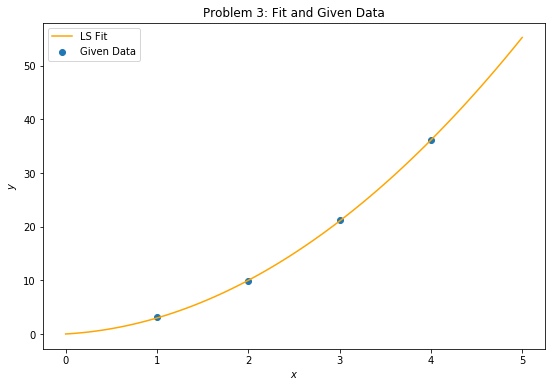

In [12]:
x = np.linspace(0, 5, 100)

plt.figure(figsize=(9,6))
plt.title("Problem 3: Fit and Given Data")
plt.plot(x, y(x), label = "LS Fit", color = "orange")
plt.scatter(X, Y, label = "Given Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

#### Part c)
Find the error in the least squares approximation.

##### Solution 
The error is of the form 
$$J(a,b) = \sum^{N}_{j=1}\left[y_j - a{x_j} - b{x_j}^{2}\right]^{2}$$

Thus we just compute the sum in order to find the error.

In [13]:
J = np.sum((Y - y(X))**2)
print("J = " + str(J))

J = 0.07716129032258028


The error in our Least Squares Approximation is:  $J(0.96419,2.01774)=0.077161$

___

### Problem 4
Consider the dataset $(x_1, f_1),\dots,(x_{N}, f_{N})$. For a given set of functions $\left\{\phi_{0},\phi_{1},\dots,\phi_{n}\right\}$ (with $n \lt \lt N$) let 
$$p(x) = a_{0}^{*}\phi_{0}(x) + a_{1}^{*}\phi_{1}(x) + \dots + a_{n}^{*}\phi_{n}(x)$$
be a least squares approximation of this data. Define

$$X = \begin{bmatrix}
 \phi_{0}(x_{1}) & \phi_{1}(x_{1})  & \phi_{2}(x_{1}) &\dots &\phi_{n}(x_{1})\\
 \phi_{0}(x_{2}) & \phi_{1}(x_{2})  & \phi_{2}(x_{2}) & \dots &\phi_{n}(x_{2})\\
 \vdots & \vdots & \vdots & \dots & \vdots\\
  \phi_{0}(x_{N}) & \phi_{1}(x_{N})  & \phi_{2}(x_{N}) &\dots &\phi_{n}(x_{N})\\
\end{bmatrix}, \mathbf{a}^{*} = \begin{bmatrix}
a_{0}^{*}\\
a_{1}^{*}\\
\vdots\\
a_{n}^{*}
\end{bmatrix}, \mathbf{f}^{*} = \begin{bmatrix}
f_{1}^{*}\\
f_{2}^{*}\\
\vdots\\
f_{N}^{*}
\end{bmatrix}
$$
and $W$ the space of linear combinations of the columns of $X$.

#### Part a)
Prove that: $X^{T}X\mathbf{a}^{*} = X^{T}\mathbf{f}$

##### Solution

Notice that we can write the Least Squares Approximation of the data as $p(\mathbf{x}) = \mathbf{a^{*}}^{T}\mathbf{x}$

So that we can then say that $\mathbf{a^{*}}$ is the vector that minimizes:

$$J(\mathbf{a^{*}})=\sum_{j = 1}^{N}\left[f_{j} - \mathbf{a^{*}}^{T}\mathbf{x}_{j}\right]^{2}$$

Which we can then write in matrix notation as:
$$J(\mathbf{a^{*}}) = (\mathbf{f}-X\mathbf{a^{*}})^{T}(\mathbf{f}-X\mathbf{a^{*}}) = \lVert\mathbf{f}-X\mathbf{a^{*}}\rVert^{2}$$

And we can find the normal equations by solving $\nabla_{a^{*}}J(\mathbf{a^*}) = 0$

Notice that each $\phi_{i}(x)$ is linear in $\mathbf{a^{*}}$ since for each $k \in 1,\dots, n$: 

$$\frac{\partial J(\mathbf{a})}{\partial a_{k} }= -2 \sum_{j = 1}^{N}\left[f_{j} - a_{0}^{*}\phi_{0}(x_{j}) - \dots - a_{n}^{*}\phi_{n}(x_{j})\right]\phi_{k}(x_{j})$$

Which then becomes:
$$\frac{\partial J(\mathbf{a})}{\partial a_{k} }= -2 \sum_{j = 1}^{N}\phi_{k}(x_{j})f_{j}+2a_{0}^{*}\sum_{j = 1}^{N}\phi_{k}(x_j)\phi_{0}(x_{j}) + \dots + 2a_{n}^{*}\sum_{j = 1}^{N}\phi_{k}(x_j)\phi_{n}(x_{j})$$

Thus doing this for each $a_{k}$ we can write $\nabla_{a^{*}}J(\mathbf{a^*}) = 0$ as:

$$-2X^{T}\mathbf{f} + 2X^{T}X\mathbf{a^{*}} = 0$$

Which then gives the usual normal equation:
$$X^{T}X\mathbf{a^{*}} = X^{T}\mathbf{f}$$

And finally gives us the expression:
$$\mathbf{a^{*}} = \left(X^{T}X\right)^{-1}X^{T}\mathbf{f}$$

Which is the desired result.

#### Part b)
Prove that: $\mathbf{f} - X\mathbf{a}^{*}$ is orthogonal to $\mathbf{w}$ for all $\mathbf{w}\in W$

##### Solution
Since $W$ is the column space of $X$, notice that $X^{T}(\mathbf{f} - X\mathbf{a^{*}})$ is performing the inner product of each column vector in the the column space with vector $\mathbf{f} - X\mathbf{a^{*}}$ i.e. it is performing the inner product of the each $w\in W$ with the residual, and if two vectors are orthogonal, then their inner product must be zero.

Thus we have:
$$X^{T}(\mathbf{f} - X\mathbf{a^{*}}) = X^{T}\mathbf{f} - X^{T}X\mathbf{a^{*}}$$

And as shown in problem 4.a above, we have: $X^{T}X\mathbf{a^{*}} = X^{T}\mathbf{f}$, therefore:

$$X^{T}(\mathbf{f} - X\mathbf{a^{*}}) = X^{T}\mathbf{f} - X^{T}X\mathbf{a^{*}} = \mathbf{0}$$

We get the $0$ vector, thus each inner product is 0, and therefor each column vector in the column space, $w \in W$, is orthogonal to $\mathbf{f} - X\mathbf{a}^{*}$

#### Part c)
Prove that: ${\lVert\mathbf{f} - X\mathbf{a}^{*}\rVert}_{2} \leq {\lVert \mathbf{f} - \mathbf{w}\rVert}_{2}$ for all $\mathbf{w}\in W$.

##### Solution
Let $\mathbf{a} \in \mathbb{R}^{N}$ be arbitrary and $\mathbf{a^{*}}$ be a solution to the normal equations.

We then have the following:
$$\lVert \mathbf{f} - X\mathbf{a}\rVert_{2} = \left[\sum_{j = 1}^{N}(f_{j} - \mathbf{a}^{T}\mathbf{x}_{j})^{2}\right]^{\frac{1}{2}}$$

So if we square both sides we have:
$$\lVert \mathbf{f} - X\mathbf{a}\rVert^{2} = \sum_{j = 1}^{N}(f_{j} - \mathbf{a}^{T}\mathbf{x}_{j})^{2}$$

Thus we can continue by adding $\mathbf{0} = X\mathbf{a^{*}} - X\mathbf{a^{*}}$

$$\lVert \mathbf{f} - X\mathbf{a}\rVert^{2}= \lVert \mathbf{f} - X\mathbf{a^{*}} + X\mathbf{a^{*}} - X\mathbf{a}\rVert^{2} = \lVert (\mathbf{f} - X\mathbf{a^{*}}) - (X\mathbf{a} - X\mathbf{a^{*}})\rVert^{2}$$

Now let $\mathbf{s} = X\mathbf{a} - X\mathbf{a^{*}}$ and $\mathbf{r} = \mathbf{f} - X\mathbf{a^{*}}$.

This gives:
$$\lVert \mathbf{f} - X\mathbf{a}\rVert^{2} = \lVert (\mathbf{f} - X\mathbf{a^{*}}) - (X\mathbf{a} - X\mathbf{a^{*}})\rVert^{2} =\lVert \mathbf{r} - \mathbf{s}\rVert^{2}$$

Notice that $\mathbf{r} = \mathbf{f} - X\mathbf{a^{*}}$ is orthogonal to all $w \in W$.

Furthermore, notice that $X\mathbf{a}\in W$ so $X\mathbf{a}-X\mathbf{a^{*}} \in W$. 

Thus, $r$ and $s$ are orthogonal.

Thus following from the orthogonality of $\mathbf{r}$ and $\mathbf{s}$ and the Cauchy-Schwarz inequality it can be shown that:
$$\lVert \mathbf{r} - \mathbf{s}\rVert^{2} = \lVert \mathbf{r}\rVert^{2} + \lVert \mathbf{s}\rVert^{2}$$

And clearly $\lVert \mathbf{r}\rVert^{2} \leq \lVert \mathbf{r}\rVert^{2} + \lVert \mathbf{s}\rVert^{2}$, so:

$$\lVert \mathbf{r} - \mathbf{s}\rVert^{2} = \lVert \mathbf{r}\rVert^{2} + \lVert \mathbf{s}\rVert^{2} \geq \lVert \mathbf{r}\rVert^{2} $$

Which leads to:

$$\lVert \mathbf{r}\rVert^{2}\leq \lVert \mathbf{r} - \mathbf{s}\rVert^{2}$$

And by substitution we have:

$$\lVert\mathbf{f} - X\mathbf{a^{*}}\rVert^{2} \leq \lVert \mathbf{f} - X\mathbf{a}\rVert^{2}$$

And by taking the square root of both sides we have:

$$\lVert\mathbf{f} - X\mathbf{a^{*}}\rVert_{2} \leq \lVert \mathbf{f} - X\mathbf{a}\rVert_{2}$$

Finally, since $\mathbf{a}$ is arbitrary in $\mathbf{R}^{N}$, then $Xa \in W$ and is arbitrary. 


So we get the result: $\lVert\mathbf{f} - X\mathbf{a^{*}}\rVert_{2} \leq \lVert \mathbf{f} - w\rVert_{2}$ for all $w \in W$.

___